<a href="https://colab.research.google.com/github/Naym0/super-eureka/blob/master/CAT1/CAT_1_Part_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **CAT 1**
### Part B: California Housing Dataset Notebook

> Group Members (ICS 4A):
1. Stephen Wanyee 
2. Nicole Muswanya
3. Daniel Olamide
4. Allan Vikiru





###**Loading the Dataset**

---




In [ ]:
!pip install seaborn

In [97]:
%matplotlib inline

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model,metrics
from sklearn.linear_model import LassoCV
from sklearn.datasets.california_housing import fetch_california_housing # fetch California housing dataset
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,KFold,cross_val_score,RandomizedSearchCV

#### Data Description


In [99]:
houses = fetch_california_housing()
print(houses.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

### **Data Preprocessing** 

---









#### First, we merge features to three DataFrames: `attributes_frame` containing the attributes; `target_frame` containing the target variable & a dataframe `df` merging the attributes and target variable.






In [100]:
attributes_frame = pd.DataFrame(houses.data, columns=houses.feature_names)
attributes = list(attributes_frame.columns)

target_frame=pd.DataFrame(houses.target) 
target_frame.columns=['MedHseVal']

df = pd.concat((attributes_frame, target_frame), axis=1)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


#### Part 1: Filling Missing Values
* In the description, it is indicated that there are no values missing in the dataset. This is validated as below:






In [101]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
MedHseVal     0
dtype: int64

#### Part 2: Data Encoding
* The datatypes for each attribute are float64 as indicated below i.e. numerical data. Therefore, there is no need for carrying out encoding.


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   MedHseVal   20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


#### Part 3: Feature Selection
* To select the relevant features, we applied heatmaps to show collinearity between attributes.


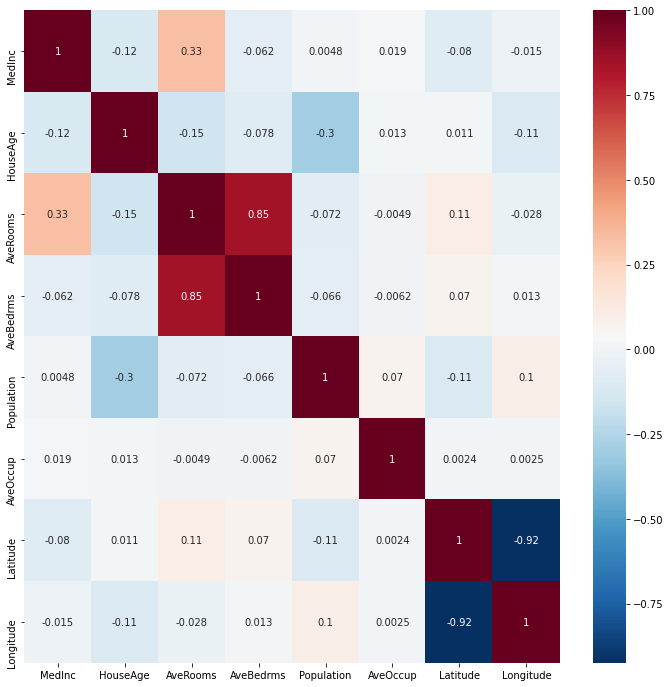

In [103]:
matrix = attributes_frame.corr() # correlation matrix
dimensions = matrix.index
plt.figure(figsize=(12,12))
h_map=sns.heatmap(df[dimensions].corr(),annot=True, cmap="RdBu_r")



> Based on the map, there is minimal collinearity between the features, with Latitude and Longitude having the least with each other (-0.92) 
. However, AveBedrooms and AveRooms have a relatively high collinearity (0.85), after deliberation, we dropped the AveRooms column.



In [104]:
dropped_attr_frame = attributes_frame.drop(columns=['AveBedrms'],axis=1)
dropped_attr_frame

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,741.0,2.123209,39.43,-121.32


#### Part 4: Feature Extraction
* For feature extraction, we implemented PCA with a 90% variance.



*First, we select all features and standardise the data to fit a Normal distribution using PowerTransformer*

In [105]:
std_X = PowerTransformer().fit_transform(dropped_attr_frame)
std_Y = PowerTransformer().fit_transform(target_frame)

*Step 2: fitting the variance and finding number of components needed*

In [106]:
pca_90_var = PCA(.90)
p90_components = pca_90_var.fit_transform(std_X)
print("We need",p90_components.shape[1],"PCs")

We need 5 PCs


*Now, apply the components to PCA data and find the percentage of information per PC*

In [107]:
pca = PCA(n_components=5)
pc_s = pca.fit_transform(std_X)
pc_df = pd.DataFrame(pc_s,columns=['PC1','PC2', 'PC3','PC4', 'PC5'])
target_pc_df = pd.DataFrame(std_Y,columns=['Median House Value'])
pca_frame = pd.concat([pc_df,target_pc_df],axis=1)

info = ((pca.explained_variance_ratio_)*100)
print("PC1:",info[0],"% & PC2:",info[1],"% & PC3:",info[2],"% & PC4:",info[3],"% & PC5:",info[4],"%")


PC1: 29.400944416584913 % & PC2: 24.080825551694762 % & PC3: 17.50774029025177 % & PC4: 13.488760388439053 % & PC5: 9.672167921369104 %


### **Data Distributions Examination** 

---








#### DataFrame illustrating distributions statistical information 


In [108]:
pca_frame.describe()

,PC1,PC2,PC3,PC4,PC5,Median House Value
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,4.471445e-16,-9.972542e-16,3.142405e-17,2.675508e-17,7.033026e-17,1.140173e-15
std,1.434631e+00,1.298360e+00,1.107068e+00,9.717296e-01,8.228513e-01,1.000024e+00
min,-4.082630e+00,-5.221731e+00,-4.627451e+00,-5.513857e+00,-3.157357e+00,-2.997447e+00
25%,-1.209969e+00,-8.557946e-01,-7.587795e-01,-5.640462e-01,-5.360178e-01,-7.379200e-01
50%,-4.136368e-01,2.875468e-02,2.106694e-03,1.025120e-01,-5.021952e-02,-1.611421e-02
75%,1.429447e+00,8.655191e-01,7.357675e-01,6.381604e-01,4.864649e-01,7.085479e-01
max,4.291404e+00,6.408274e+00,6.525049e+00,5.886272e+00,5.822281e+00,1.898584e+00


#### Using Seaborn to describe the distributions

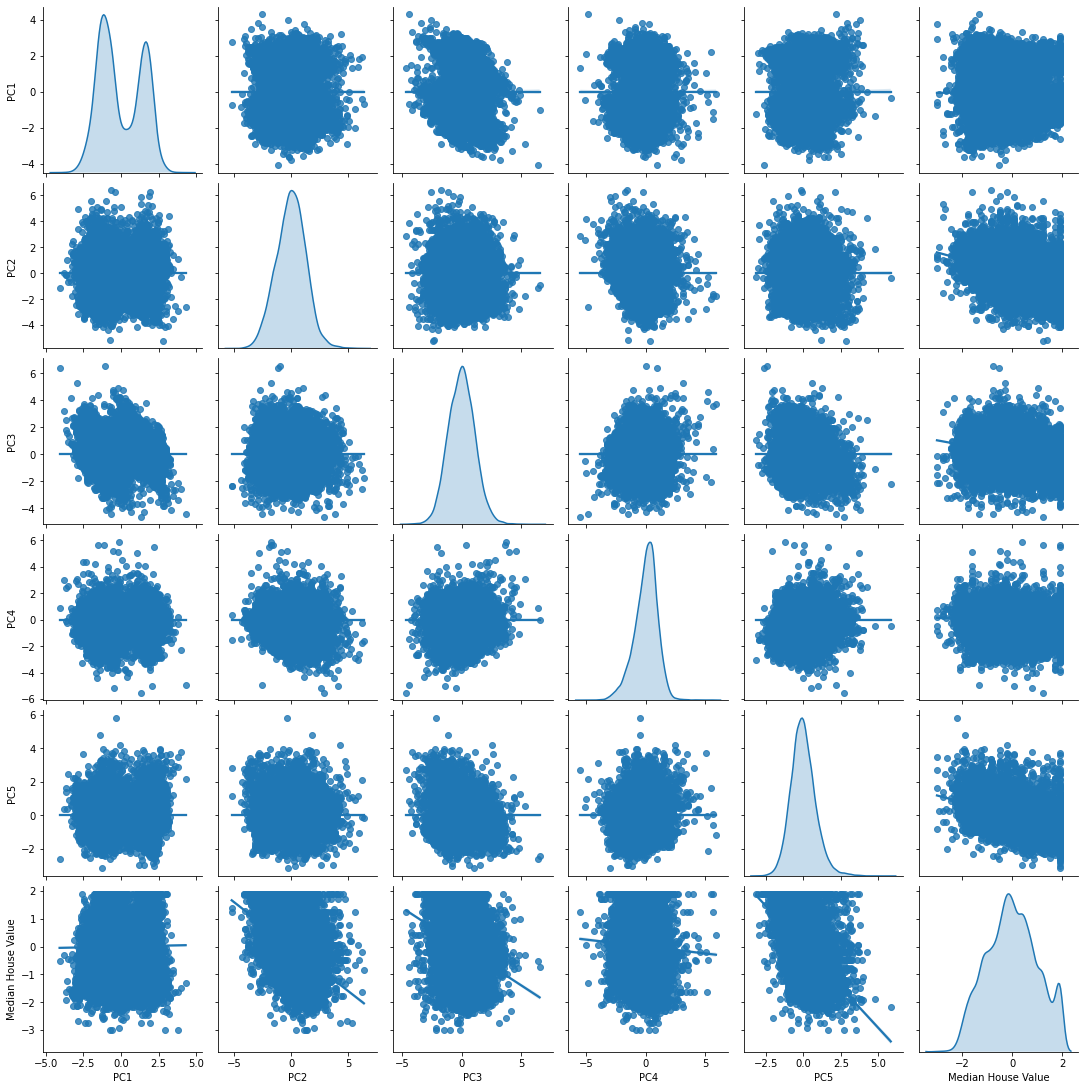

In [109]:
sns.pairplot(pca_frame,kind='reg',diag_kind='kde')

### **Model Selection** 

---


We first select the regression models to be tested against: 
* `Linear`
* `Lasso`
* `Ridge`
* `ElasticNet`





In [110]:
models = {'Linear':linear_model.LinearRegression(),
          'Lasso':linear_model.Lasso(),
          'Ridge':linear_model.Ridge(),
          'ElasticNet':linear_model.ElasticNet()}

Next, we split the data into train and test sets (80% and 20% of the dataset)

In [111]:
X=pc_df.copy()
Y=target_pc_df.copy()

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

Now, we find the rate of accuracy in each model, from their train and test sets.

In [112]:
train_result = {}

for i in models:
  models[i].fit(X_train,Y_train)
  train_accuracy = models[i].score(X_train, Y_train)
  train_result[i]=[train_accuracy]

pd.DataFrame(train_result, index=['Training Accuracy:'])

,Linear,Lasso,Ridge,ElasticNet
Training Accuracy:,0.504491,0.0,0.504491,0.017478


In [113]:
test_result = {}

for i in models:
  models[i].fit(X_test,Y_test)
  test_accuracy = models[i].score(X_test, Y_test)
  test_result[i]=[test_accuracy]

pd.DataFrame(test_result, index=['Test Accuracy:'])

,Linear,Lasso,Ridge,ElasticNet
Test Accuracy:,0.493051,0.0,0.493051,0.017977


As defined above, the Linear and Ridge Regression models register a higher level of accuracy than Lasso and ElasticNet. 

### **Cross Validation** 

---
Implementation of K-Fold cross validation:

In [114]:
result={}
scores={}
params={}

kfold = KFold(n_splits= 5)
for i in models:
    regressor = models[i]
    c_validated = cross_val_score(regressor,X_train,Y_train,cv=kfold)  
    accuracy = c_validated.mean()
    result[i]=[accuracy]
pd.DataFrame(result, index=['Accuracy:'])

,Linear,Lasso,Ridge,ElasticNet
Accuracy:,0.503404,-0.000226,0.503404,0.017126


Testing increase in the value of K - from 5 to 100

In [115]:
k_test = KFold(n_splits= 100)
for i in models:
    regressor = models[i]
    c_validated = cross_val_score(regressor,X_train,Y_train,cv=k_test)  
    accuracy = c_validated.mean()
    result[i]=[accuracy]
pd.DataFrame(result, index=['Accuracy:'])

,Linear,Lasso,Ridge,ElasticNet
Accuracy:,0.500071,-0.004426,0.500072,0.013044


> *Observation: The accuracy value drops by 0.003 (0.3%)* 

When we increase the value of K i.e. ```n_splits```, the accuracy of the models decreases. This is because as the test set is further split into smaller sets, for use in the training set. A larger training set brings about lower bias which implies a lower rate of model accuracy.  



### **Hyperparameter Tuning (Randomized)** 

---
Here we demosntrate hyperparemeter tuning via RandomizedSearchCV

In [116]:
for i in models:
  regressor = models[i]
  if i == 'Lasso':
    lasso_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03],'max_iter':[1000,1100,2000],'tol':[0.001,0.0001,0.000001]}
    random = RandomizedSearchCV(regressor,param_distributions=lasso_params,cv=3,n_jobs=-1)
    results = random.fit(X_train,Y_train)
    accuracy = results.score(X_test,Y_test)
    score = results.best_score_
    param = results.best_params_
  elif i == 'Ridge':
    ridge_params = {'alpha':np.logspace(-2, 0.5, 60)}
    random = RandomizedSearchCV(regressor,param_distributions=ridge_params,cv=3,n_jobs=-1)
    results = random.fit(X_train,Y_train)
    accuracy = results.score(X_test,Y_test)
    score = results.best_score_
    param = results.best_params_
  elif i == 'Linear':
    c_validated = cross_val_score(regressor,X_train,Y_train,cv=kfold)
    accuracy = c_validated.mean()
    score = results.best_score_
    param = results.best_params_
  elif i == 'Elastic':
    elastic_params = {np.linspace(0, 5, 20)}
    random = RandomizedSearchCV(regressor,param_distributions=elastic_params,cv=3,n_jobs=-1)
    results = random.fit(X_train,Y_train)
    accuracy = results.score(X_test,Y_test)
    score = results.best_score_
    param = results.best_params_
  result[i]=[accuracy]
  scores[i]=[score]
  params[i]=[param]

print('Accuracy:',result, '\n\nBest Scores:',scores,'\n\nBest Parameter:',params)

Accuracy: {'Linear': [0.5034041623287343], 'Lasso': [0.49202213315607535], 'Ridge': [0.4916944382272822], 'ElasticNet': [0.4916944382272822]} 

Best Scores: {'Linear': [0.5039218716560369], 'Lasso': [0.50215910311279], 'Ridge': [0.5039218287674477], 'ElasticNet': [0.5039218287674477]} 

Best Parameter: {'Linear': [{'alpha': 2.359833466782194}], 'Lasso': [{'tol': 0.001, 'max_iter': 2000, 'alpha': 0.02}], 'Ridge': [{'alpha': 1.9414919457438817}], 'ElasticNet': [{'alpha': 1.9414919457438817}]}
